#https://www.kaggle.com/kartikmohan1999/covid19-sentiment-analysis

### Importing Packages

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Reading Data

In [20]:
# Reading data
df=pd.read_csv('C:/Users/saksh/OneDrive/Desktop/Sentiment Dashboard/Analysis/2020-04-28 Coronavirus Tweets.csv')
df.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1254923282106798086,860252856829587457,2020-04-28T00:00:00Z,IMSS_SanLuis,"Asegura sus beneficios, registra a tus hijas e...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,1137,41,NaN,2017-05-04T22:00:38Z,False,es
1,1254923282798850049,44728980,2020-04-28T00:00:00Z,ANCALERTS,Mysterious blood clots are #COVID19's latest l...,TweetDeck,NaN,NaN,NaN,False,...,12,NaN,NaN,NaN,4926070,774,NaN,2009-06-04T21:26:24Z,True,en
2,1254923282912104448,166356616,2020-04-28T00:00:00Z,diarioelpopular,¿Quién podrá ayudarnos? 😫 Más de 200 hospitale...,TweetDeck,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,32376,116,NaN,2010-07-13T23:33:14Z,False,es
3,1254923281943031815,1042498579909107712,2020-04-28T00:00:00Z,ContraReplicaMX,"La jefa de @GobCDMX, @Claudiashein, dio a cono...",TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,13543,2555,NaN,2018-09-19T19:40:04Z,False,es
4,1254923284182970370,421268817,2020-04-28T00:00:00Z,ebcnarede,😷 #covid19: relatório da @fiocruz e da @FGV al...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,74628,574,NaN,2011-11-25T18:38:09Z,True,pt


In [21]:
# dropping columns
tweet = df.copy()
tweet.drop(['status_id','user_id','screen_name','source','reply_to_status_id','reply_to_user_id','is_retweet','place_full_name','place_type','reply_to_screen_name','is_quote','followers_count','friends_count','account_lang','account_created_at','verified'],axis=1, inplace = True)
tweet.head()

,created_at,text,favourites_count,retweet_count,country_code,lang
0,2020-04-28T00:00:00Z,"Asegura sus beneficios, registra a tus hijas e...",429,0,NaN,es
1,2020-04-28T00:00:00Z,Mysterious blood clots are #COVID19's latest l...,5448,12,NaN,en
2,2020-04-28T00:00:00Z,¿Quién podrá ayudarnos? 😫 Más de 200 hospitale...,4347,1,NaN,es
3,2020-04-28T00:00:00Z,"La jefa de @GobCDMX, @Claudiashein, dio a cono...",5793,0,NaN,es
4,2020-04-28T00:00:00Z,😷 #covid19: relatório da @fiocruz e da @FGV al...,1257,0,NaN,pt


### Cleaning Data

In [22]:
# filtering data with 'country_code = IN' and 'language = en'
tweet =tweet[(tweet.country_code == "IN") & (tweet.lang == "en")].reset_index(drop = True)
tweet.drop(['country_code','lang'],axis=1,inplace=True)
tweet.head()

,created_at,text,favourites_count,retweet_count
0,2020-04-28T00:04:16Z,"@naqvimukhtar ""कोरोना के मरीज गुजरात मे दूसरे ...",1948,0
1,2020-04-28T00:06:27Z,J&amp;K: 23 more people tested positive for #C...,2146,0
2,2020-04-28T00:26:29Z,"A young couple from #Chhattisgarh, #India grab...",1874,0
3,2020-04-28T00:35:56Z,#Coronavirus | Retailers gear up for the ‘new ...,343,0
4,2020-04-28T00:44:18Z,"@RanaAyyub Hi ma'am,@RanaAyyub\nMy name is Vas...",14,0


In [23]:
# created_at column
tweet["created_at"] = tweet["created_at"].apply(lambda i:(int(i.split("T")[1].split(":")[0])+int(i.split("T")[1].split(":")[1])/60))

In [24]:
# shape
tweet.shape

(972, 4)

In [25]:
# check missing values
tweet.isna().sum()

created_at          0
text                0
favourites_count    0
retweet_count       0
dtype: int64

In [26]:
# data preprocessing
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet['text'][i]).split()).lower()
tweet['text'].head()

0    zara inn parr bhi khuch tipdi kar d tabligiher...
1    j amp k 23 more people tested positive for cov...
2    a young couple from chhattisgarh india grabbed...
3     coronavirus retailers gear up for the new normal
4    hi ma am my name is vasist i am from mumbai an...
Name: text, dtype: object

### Top 5 most favourited tweets:

In [27]:
fav = tweet[['favourites_count','text']].sort_values('favourites_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', fav['text'][i],'\n')

0 ] missed this bihu due to covid19 

1 ] who did this stayhomestaysafe modigovtfailedlockdown covid2019india 

2 ] who did this stayhomestaysafe modigovtfailedlockdown covid2019india 

3 ] who did this stayhomestaysafe modigovtfailedlockdown covid2019india 

4 ] the 2 most incompetent musketeers will take the credit to declare lockdown with zero pre planning or impact analysis but how amp when to come out of this will be decided by states banevm coronavirus 



### Top 5 most retweeted tweets:

In [31]:
retweet = tweet[['retweet_count','text']].sort_values('retweet_count',ascending = False)[:5].reset_index()
for i in range(5):
    print(i,']', retweet['text'][i],'\n')

0 ] if he had been the son of the dm or any other official would the hospitals have refused 12 year old dies of stomach pain after 6 agra hospitals refuse treatment over covid scare my ground report from agra via covid 19 

1 ] in the instructions of national president barrister sahab allahabad up president mohd shah alam is distributing relief material ramazan kits continuously from 1st roza among the people who have been effected dua to covid 19 lockdown 

2 ] breaking niti aayog building sealed in india an employee working at niti bhavan has been detected positive with covid19 it was informed to the authorities at 9am this morning niti aayog is following all the due protocols necessary as per the ministry of health guidelines 

3 ] in mizoram 95 year old mrs nghakliani of dawrpui aizawl donated dozens of face masks stitched by herself to local hospital she also donated one month s family pension for corona relief covid19 indiafightscorona 

4 ] just as terrorists have no religion si

### Number of Tweets/Hour

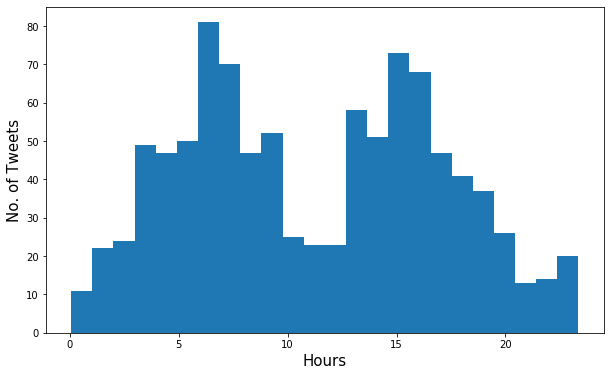

In [33]:
plt.figure(1, figsize=(10,6))
plt.hist(tweet["created_at"],bins = 24);
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.savefig('No of Tweets per Hour')

### Word Cloud :

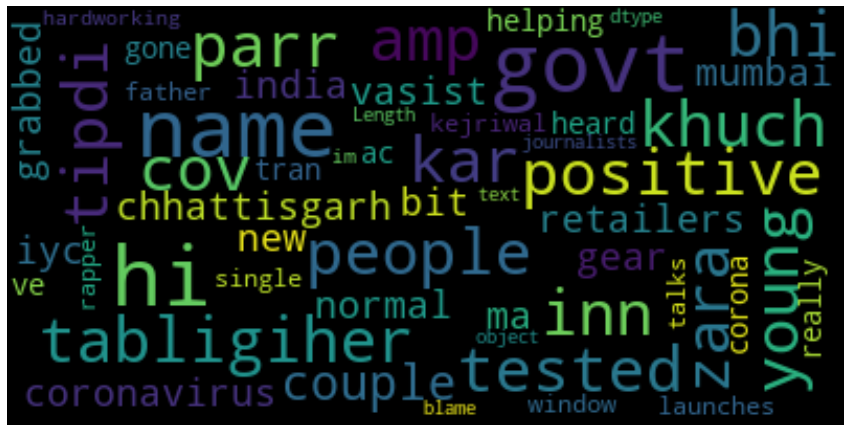

<Figure size 432x288 with 0 Axes>

In [14]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])
plt.savefig('WordCloud of Corona-Tweets')

### Removing Stopwords

In [34]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [35]:
#Removing Stop Words
tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head() 

0    zara inn parr bhi khuch tipdi kar d tabligiher...
1    j amp 23 people tested positive covid19 last 2...
2    young couple chhattisgarh india grabbed headli...
3                coronavirus retailers gear new normal
4    hi ma name vasist mumbai andheri help needed h...
Name: text, dtype: object

### Analyzing Text for Sentiment

Analyzing text using TextBlob to predict the sentiment of the text and categorise it as 'Positive', 'Negative' or 'Neutral'.

In [36]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,favourites_count,retweet_count,sentiment,polarity
0,0.066667,zara inn parr bhi khuch tipdi kar d tabligiher...,1948,0,negative,-0.3
1,0.100000,j amp 23 people tested positive covid19 last 2...,2146,0,positive,0.0757576
2,0.433333,young couple chhattisgarh india grabbed headli...,1874,0,positive,0.05
3,0.583333,coronavirus retailers gear new normal,343,0,positive,0.143182
4,0.733333,hi ma name vasist mumbai andheri help needed h...,14,0,positive,0.8


positive    466
neutral     364
negative    142
Name: sentiment, dtype: int64


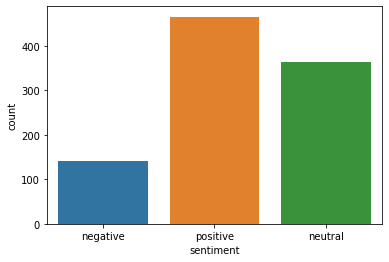

In [38]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

### Sentiment Distribution

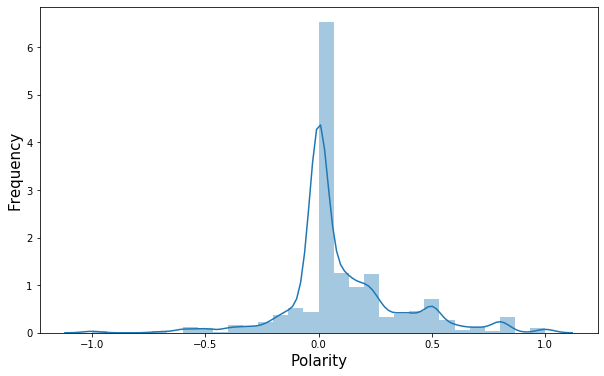

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();
plt.savefig('Sentiment Distribution')

### Using Word Clouds to see the higher fequency words from each sentiment

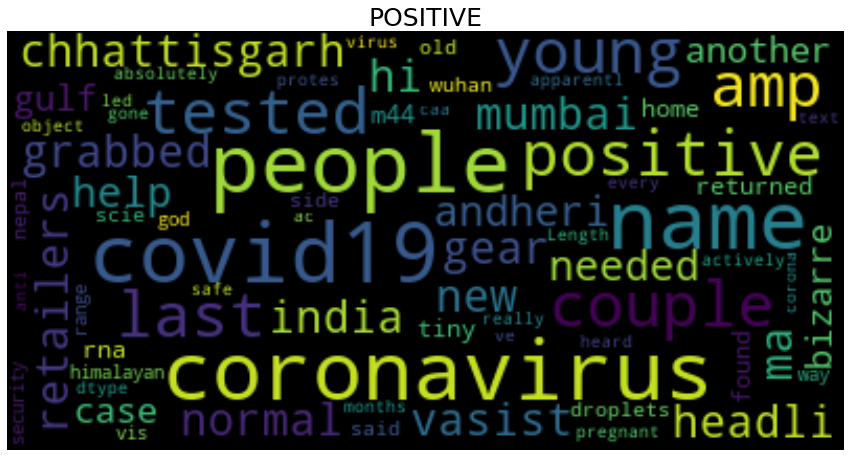

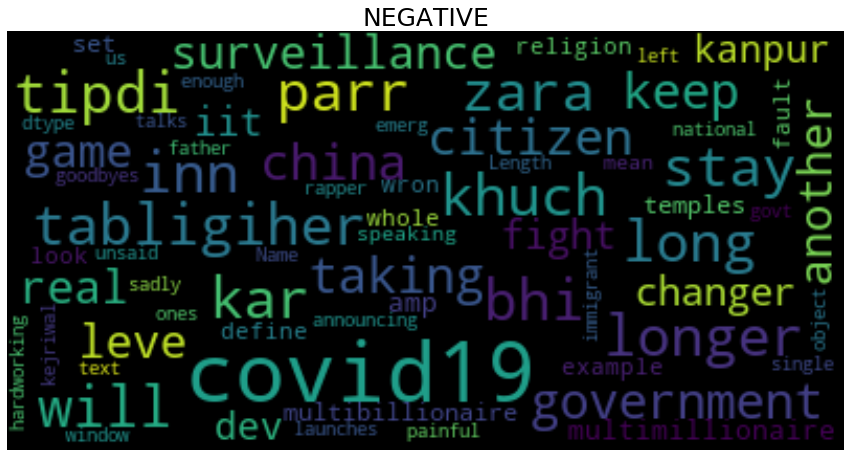

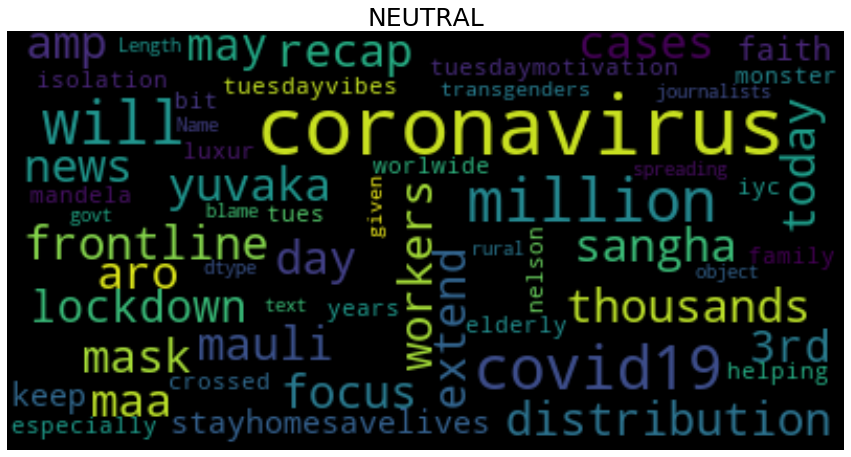

In [20]:
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [21]:
count = pd.DataFrame(tweet.groupby('sentiment')['favourites_count'].sum())
count.head()

,favourites_count
sentiment,
negative,1567304
neutral,3181934
positive,3621749


### Most frequently appearing words

In [22]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [23]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,covid19,505
1,coronavirus,328
2,covid,208
3,lockdown,183
4,stayhomestaysafe,168


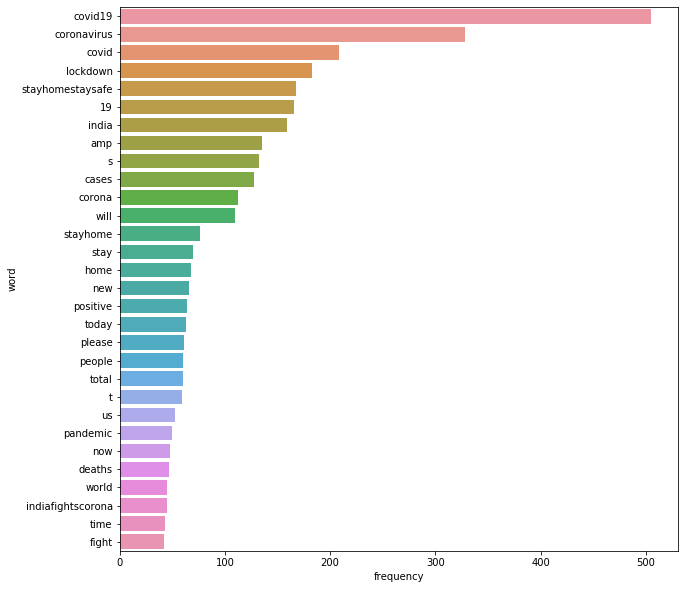

In [24]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [25]:
tweet.to_csv('tweet.csv',index=False)